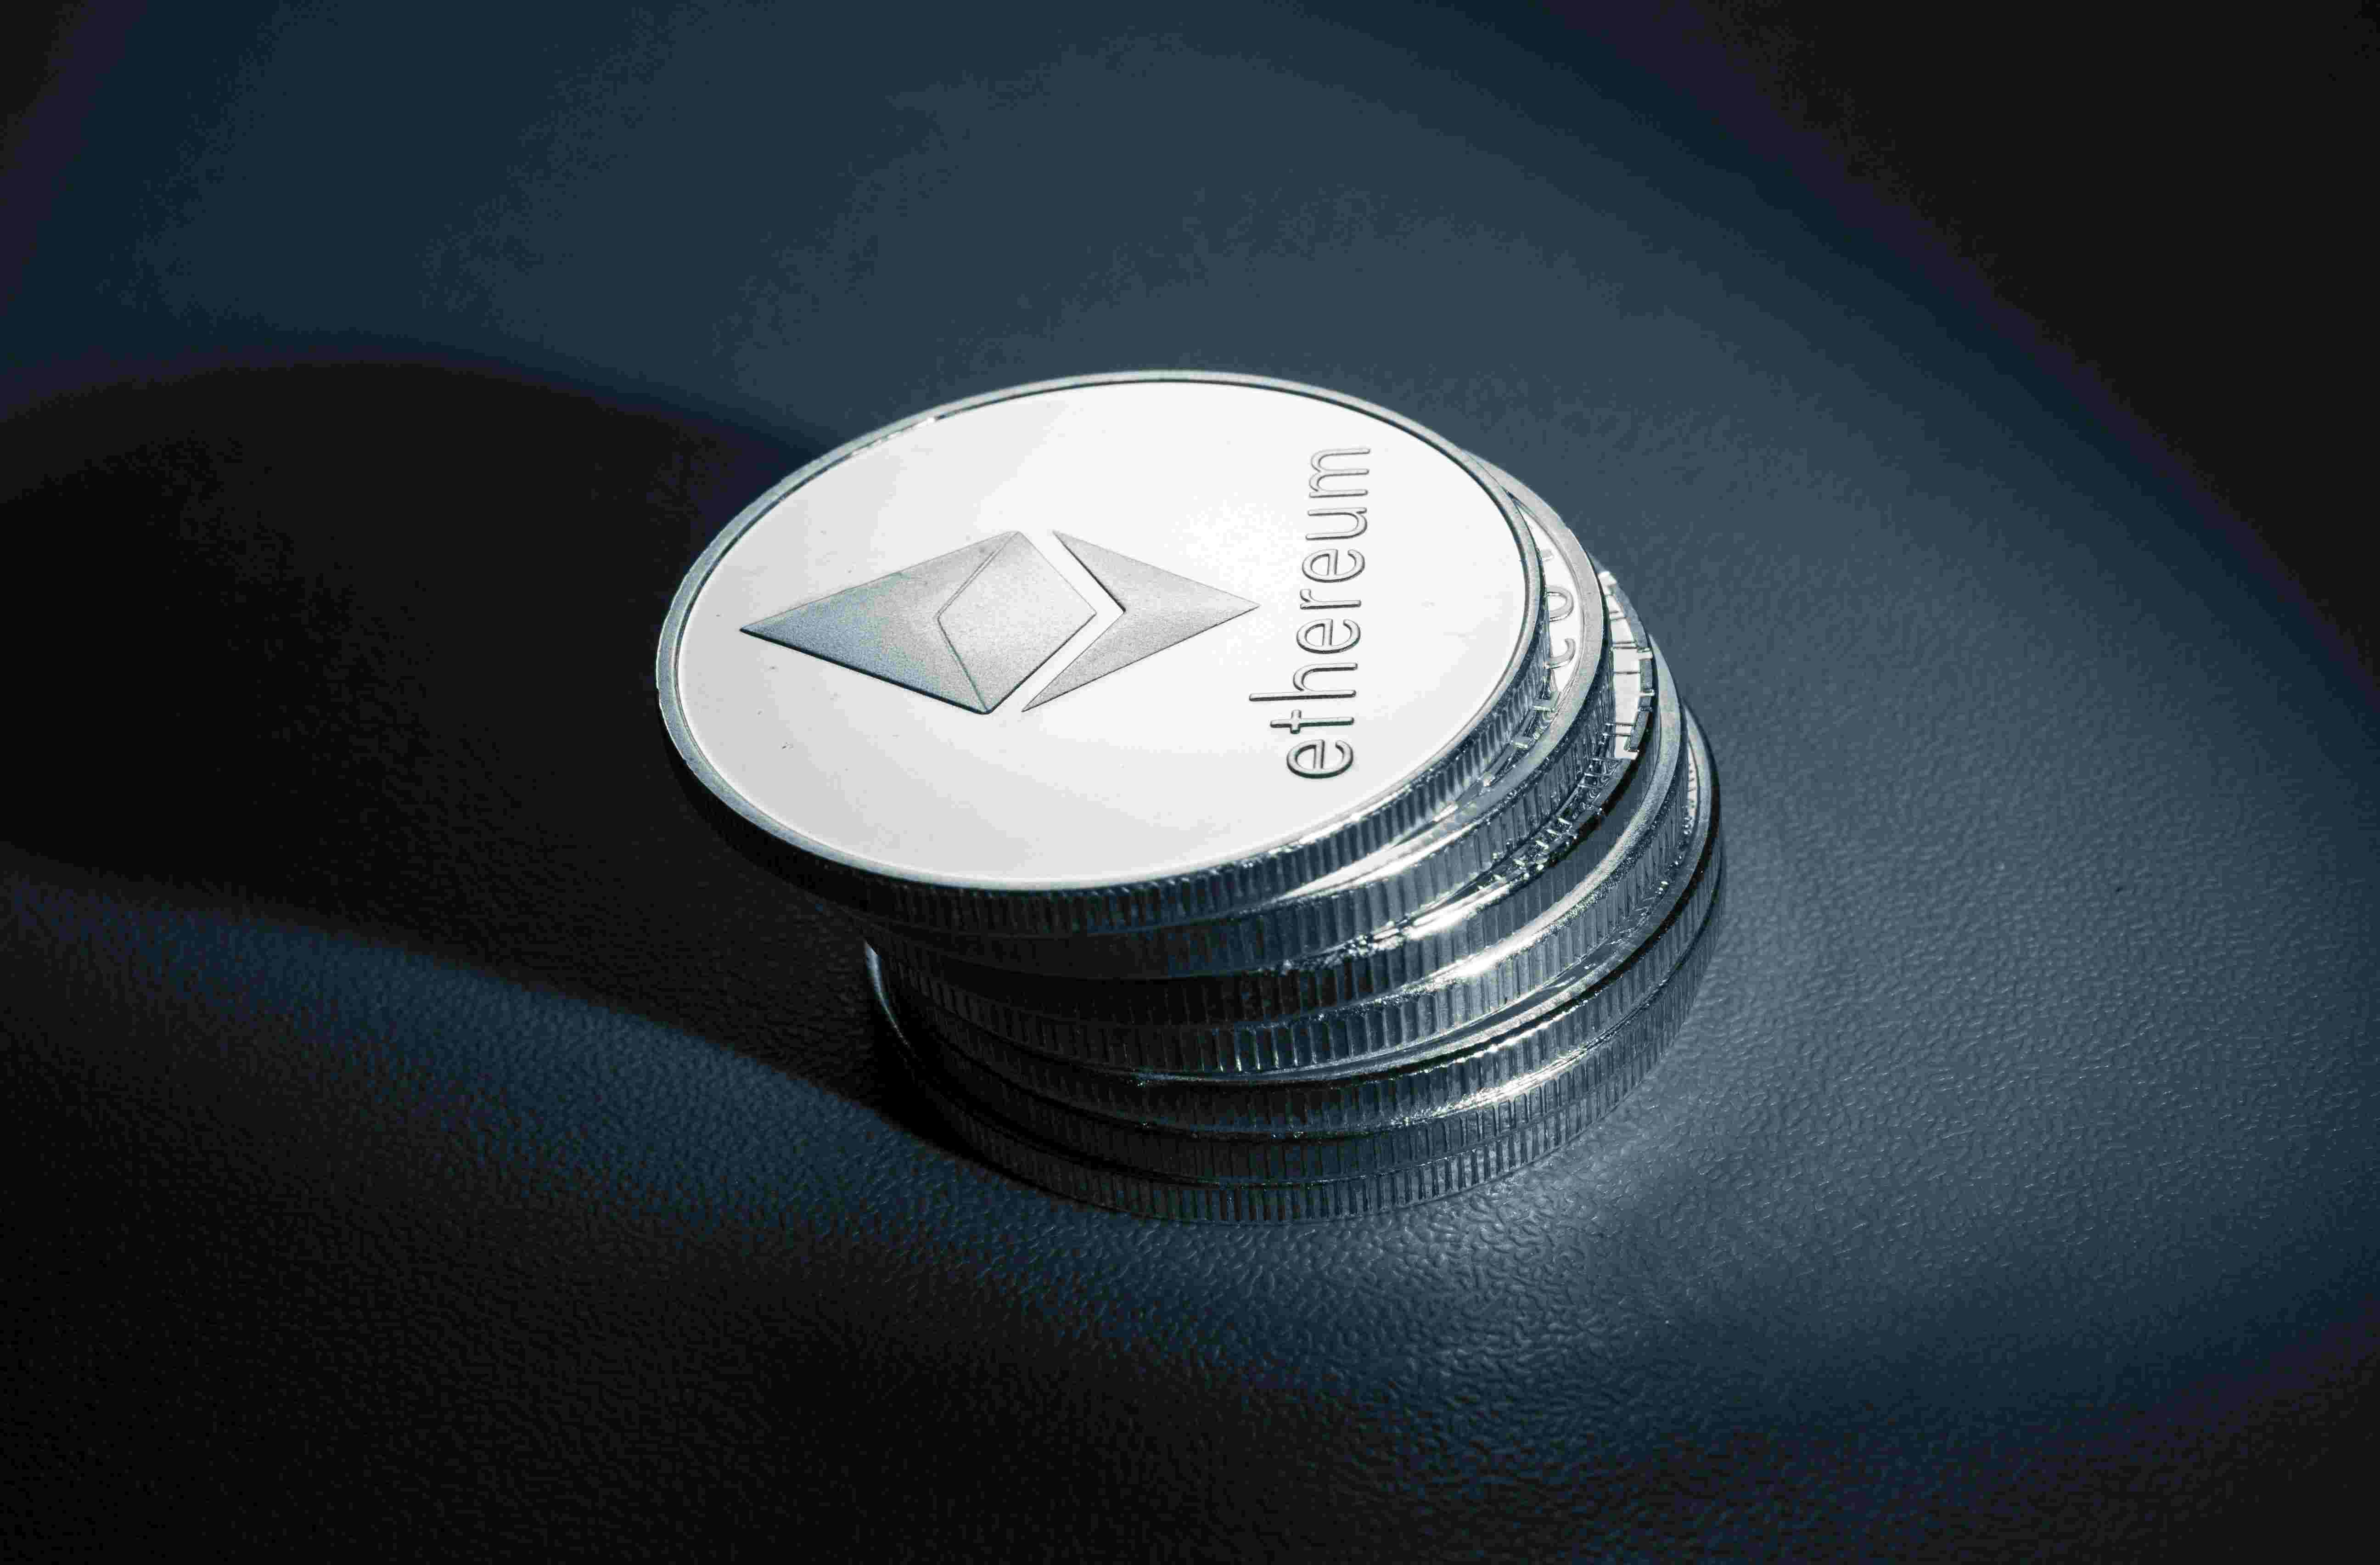

# Table of Contents
* [Import Libraries](#Import-Libraries)
* [Exploration](#Exploration)
* [Correlation Matrix of the numerical features](#Correlation-Matrix-of-the-numerical-features)
* [Data Pre-Processing](#Data-Preprocessing)
* [Heatmap](#Heatmap)
* [Standartization](#Standartization)
* [Dealing With Outliers](#Dealing-With-Outliers)
* [Label Encoding](#Label-Encoding)
* [Modeling](#Modeling)
* [Best Model-Random Forest](#Best-Model-Random-Forest)
* [PCA](#PCA)
* [Back To Pre-proccessing](#Back-To-Pre-proccessing)
* [Conclusion](#Conclusion)



# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as pyo
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import plot_precision_recall_curve,plot_roc_curve
%matplotlib inline

# Exploration

In [2]:
df = pd.read_csv('../input/ethereum-frauddetection-dataset/transaction_dataset.csv')
pd.set_option('display.max_columns', None)
df.head()

,Unnamed: 0,Index,Address,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,max value received,avg val received,min val sent,max val sent,avg val sent,min value sent to contract,max val sent to contract,avg value sent to contract,total transactions (including tnx to create contract,total Ether sent,total ether received,total ether sent contracts,total ether balance,Total ERC20 tnxs,ERC20 total Ether received,ERC20 total ether sent,ERC20 total Ether sent contract,ERC20 uniq sent addr,ERC20 uniq rec addr,ERC20 uniq sent addr.1,ERC20 uniq rec contract addr,ERC20 avg time between sent tnx,ERC20 avg time between rec tnx,ERC20 avg time between rec 2 tnx,ERC20 avg time between contract tnx,ERC20 min val rec,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name,ERC20 most sent token type,ERC20_most_rec_token_type
0,0,1,0x00009277775ac7d0d59eaad8fee3d10ac6c805e8,0,844.26,1093.71,704785.63,721,89,0,40,118,0.000000,45.806785,6.589513,0.00,31.220000,1.200681,0.0,0.0,0.0,810,865.691093,586.466675,0.0,-279.224419,265.0,3.558854e+07,3.560317e+07,0.0,30.0,54.0,0.0,58.0,0.0,0.0,0.0,0.0,0.0,1.500000e+07,265586.147600,0.000000,1.683100e+07,271779.920000,0.0,0.0,0.0,39.0,57.0,Cofoundit,Numeraire
1,1,2,0x0002b44ddb1476db43c868bd494422ee4c136fed,0,12709.07,2958.44,1218216.73,94,8,0,5,14,0.000000,2.613269,0.385685,0.00,1.800000,0.032844,0.0,0.0,0.0,102,3.087297,3.085478,0.0,-0.001819,8.0,4.034283e+02,2.260809e+00,0.0,1.0,5.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,3.650000e+02,57.632615,2.260809,2.260809e+00,2.260809,0.0,0.0,0.0,1.0,7.0,Livepeer Token,Livepeer Token
2,2,3,0x0002bda54cb772d040f779e88eb453cac0daa244,0,246194.54,2434.02,516729.30,2,10,0,10,2,0.113119,1.165453,0.358906,0.05,3.538616,1.794308,0.0,0.0,0.0,12,3.588616,3.589057,0.0,0.000441,8.0,5.215121e+02,0.000000e+00,0.0,0.0,7.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,4.428198e+02,65.189009,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,8.0,None,XENON
3,3,4,0x00038e6ba2fd5c09aedb96697c8d7b8fa6632e5e,0,10219.60,15785.09,397555.90,25,9,0,7,13,0.000000,500.000000,99.488840,0.00,450.000000,70.001834,0.0,0.0,0.0,34,1750.045862,895.399559,0.0,-854.646303,14.0,1.711105e+04,1.141223e+04,0.0,2.0,11.0,0.0,11.0,0.0,0.0,0.0,0.0,0.0,1.141223e+04,1555.550174,100.000000,9.029231e+03,3804.076893,0.0,0.0,0.0,1.0,11.0,Raiden,XENON
4,4,5,0x00062d1dd1afb6fb02540ddad9cdebfe568e0d89,0,36.61,10707.77,382472.42,4598,20,1,7,19,0.000000,12.802411,2.671095,0.00,9.000000,0.022688,0.0,0.0,0.0,4619,104.318883,53.421897,0.0,-50.896986,42.0,1.628297e+05,1.235399e+05,0.0,4.0,23.0,0.0,27.0,0.0,0.0,0.0,0.0,0.0,9.000000e+04,4934.232147,0.000000,4.500000e+04,13726.659220,0.0,0.0,0.0,6.0,27.0,StatusNetwork,EOS


In [3]:
df.drop(['Unnamed: 0','Index'],axis =1,inplace = True)
df.head()

,Address,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,max value received,avg val received,min val sent,max val sent,avg val sent,min value sent to contract,max val sent to contract,avg value sent to contract,total transactions (including tnx to create contract,total Ether sent,total ether received,total ether sent contracts,total ether balance,Total ERC20 tnxs,ERC20 total Ether received,ERC20 total ether sent,ERC20 total Ether sent contract,ERC20 uniq sent addr,ERC20 uniq rec addr,ERC20 uniq sent addr.1,ERC20 uniq rec contract addr,ERC20 avg time between sent tnx,ERC20 avg time between rec tnx,ERC20 avg time between rec 2 tnx,ERC20 avg time between contract tnx,ERC20 min val rec,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name,ERC20 most sent token type,ERC20_most_rec_token_type
0,0x00009277775ac7d0d59eaad8fee3d10ac6c805e8,0,844.26,1093.71,704785.63,721,89,0,40,118,0.000000,45.806785,6.589513,0.00,31.220000,1.200681,0.0,0.0,0.0,810,865.691093,586.466675,0.0,-279.224419,265.0,3.558854e+07,3.560317e+07,0.0,30.0,54.0,0.0,58.0,0.0,0.0,0.0,0.0,0.0,1.500000e+07,265586.147600,0.000000,1.683100e+07,271779.920000,0.0,0.0,0.0,39.0,57.0,Cofoundit,Numeraire
1,0x0002b44ddb1476db43c868bd494422ee4c136fed,0,12709.07,2958.44,1218216.73,94,8,0,5,14,0.000000,2.613269,0.385685,0.00,1.800000,0.032844,0.0,0.0,0.0,102,3.087297,3.085478,0.0,-0.001819,8.0,4.034283e+02,2.260809e+00,0.0,1.0,5.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,3.650000e+02,57.632615,2.260809,2.260809e+00,2.260809,0.0,0.0,0.0,1.0,7.0,Livepeer Token,Livepeer Token
2,0x0002bda54cb772d040f779e88eb453cac0daa244,0,246194.54,2434.02,516729.30,2,10,0,10,2,0.113119,1.165453,0.358906,0.05,3.538616,1.794308,0.0,0.0,0.0,12,3.588616,3.589057,0.0,0.000441,8.0,5.215121e+02,0.000000e+00,0.0,0.0,7.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,4.428198e+02,65.189009,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,8.0,None,XENON
3,0x00038e6ba2fd5c09aedb96697c8d7b8fa6632e5e,0,10219.60,15785.09,397555.90,25,9,0,7,13,0.000000,500.000000,99.488840,0.00,450.000000,70.001834,0.0,0.0,0.0,34,1750.045862,895.399559,0.0,-854.646303,14.0,1.711105e+04,1.141223e+04,0.0,2.0,11.0,0.0,11.0,0.0,0.0,0.0,0.0,0.0,1.141223e+04,1555.550174,100.000000,9.029231e+03,3804.076893,0.0,0.0,0.0,1.0,11.0,Raiden,XENON
4,0x00062d1dd1afb6fb02540ddad9cdebfe568e0d89,0,36.61,10707.77,382472.42,4598,20,1,7,19,0.000000,12.802411,2.671095,0.00,9.000000,0.022688,0.0,0.0,0.0,4619,104.318883,53.421897,0.0,-50.896986,42.0,1.628297e+05,1.235399e+05,0.0,4.0,23.0,0.0,27.0,0.0,0.0,0.0,0.0,0.0,9.000000e+04,4934.232147,0.000000,4.500000e+04,13726.659220,0.0,0.0,0.0,6.0,27.0,StatusNetwork,EOS


In [4]:
# Checking the counts of each label (fraud and non-fraud)

print(df['FLAG'].value_counts())

print()
#Checking if there is rows without determining whether the transaction is fraud or not

print(df['FLAG'].isnull().sum())

0    7662
1    2179
Name: FLAG, dtype: int64

0


#### We can see that the data is imbalanced, and it's something important we should consider later when modeling

In [5]:
#Important information about each feature

df.describe()

,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,max value received,avg val received,min val sent,max val sent,avg val sent,min value sent to contract,max val sent to contract,avg value sent to contract,total transactions (including tnx to create contract,total Ether sent,total ether received,total ether sent contracts,total ether balance,Total ERC20 tnxs,ERC20 total Ether received,ERC20 total ether sent,ERC20 total Ether sent contract,ERC20 uniq sent addr,ERC20 uniq rec addr,ERC20 uniq sent addr.1,ERC20 uniq rec contract addr,ERC20 avg time between sent tnx,ERC20 avg time between rec tnx,ERC20 avg time between rec 2 tnx,ERC20 avg time between contract tnx,ERC20 min val rec,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name
count,9841.000000,9841.000000,9841.000000,9.841000e+03,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9.841000e+03,9.841000e+03,9841.000000,9.841000e+03,9012.000000,9.012000e+03,9.012000e+03,9012.000000,9012.000000,9012.000000,9012.000000,9012.000000,9012.0,9012.0,9012.0,9012.0,9012.000000,9.012000e+03,9.012000e+03,9.012000e+03,9.012000e+03,9.012000e+03,9012.0,9012.0,9012.0,9012.000000,9012.000000
mean,0.221421,5086.878721,8004.851184,2.183333e+05,115.931714,163.700945,3.729702,30.360939,25.840159,43.845153,523.152481,100.711721,4.800090,314.617297,44.755731,0.000003,0.000008,0.000005,283.362362,1.016092e+04,1.163832e+04,0.000008,1.477395e+03,36.255659,1.296207e+08,1.386849e+07,110.939207,5.638038,7.598535,0.003440,4.901909,0.0,0.0,0.0,0.0,485.614688,1.252524e+08,4.346203e+06,1.174126e+04,1.303594e+07,6.318389e+06,0.0,0.0,0.0,1.384931,4.826676
std,0.415224,21486.549974,23081.714801,3.229379e+05,757.226361,940.836550,141.445583,298.621112,263.820410,325.929139,13008.821539,2885.002236,138.609682,6629.212643,239.080215,0.000225,0.000516,0.000323,1352.404013,3.583227e+05,3.642048e+05,0.000516,2.424254e+05,447.528908,1.053858e+10,1.180390e+09,6128.634953,105.252500,81.818470,0.065698,17.246576,0.0,0.0,0.0,0.0,16883.278712,1.053741e+10,2.141192e+08,1.053567e+06,1.179905e+09,5.914764e+08,0.0,0.0,0.0,6.735121,16.678607
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,-1.560535e+07,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000
25%,0.000000,0.000000,0.000000,3.169300e+02,1.000000,1.000000,0.000000,1.000000,1.000000,0.001000,1.000000,0.426905,0.000000,0.164577,0.086184,0.000000,0.000000,0.000000,4.000000,2.262059e-01,2.670424e+00,0.000000,6.214900e-04,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000
50%,0.000000,17.340000,509.770000,4.663703e+04,3.000000,4.000000,0.000000,2.000000,2.000000,0.095856,6.000000,1.729730,0.049126,4.999380,1.606000,0.000000,0.000000,0.000000,8.000000,1.248680e+01,3.052963e+01,0.000000,1.722000e-03,1.000000,1.000000e-12,0.000000e+00,0.000000,0.000000,1.000000,0.000000,1.000000,0.0,0.0,0.0,0.0,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,1.000000
75%,0.000000,565.470000,5480.390000,3.040710e+05,11.000000,27.000000,0.000000,5.000000,3.000000,2.000000,67.067040,22.000000,0.998800,61.520653,21.999380,0.000

#### We learned a lot from the std describing for each feature, there are few features that all of their values are around the value of 0 ,so we may not use them when modeling

In [6]:
# Looking at the number if null values of each feature

print (df.isnull().sum()[df.isnull().sum()>0])

print()
# Checking the number of unique values on these specific categorical features

print(df[' ERC20_most_rec_token_type'].nunique())
print(df[' ERC20 most sent token type'].nunique())

 Total ERC20 tnxs                       829
 ERC20 total Ether received             829
 ERC20 total ether sent                 829
 ERC20 total Ether sent contract        829
 ERC20 uniq sent addr                   829
 ERC20 uniq rec addr                    829
 ERC20 uniq sent addr.1                 829
 ERC20 uniq rec contract addr           829
 ERC20 avg time between sent tnx        829
 ERC20 avg time between rec tnx         829
 ERC20 avg time between rec 2 tnx       829
 ERC20 avg time between contract tnx    829
 ERC20 min val rec                      829
 ERC20 max val rec                      829
 ERC20 avg val rec                      829
 ERC20 min val sent                     829
 ERC20 max val sent                     829
 ERC20 avg val sent                     829
 ERC20 min val sent contract            829
 ERC20 max val sent contract            829
 ERC20 avg val sent contract            829
 ERC20 uniq sent token name             829
 ERC20 uniq rec token name      

# Data Preprocessing

In [7]:
#checking for dupplicated values
df[df.duplicated()== True]
df.drop_duplicates(inplace = True)

### Renaming The Features Names To The Same Names Without Spaces
df_copy = df.copy()
for i in df_copy.columns:
    df_copy.rename(columns=str.strip,inplace = True)
    
### Making Mean Imputatinons To Numeric Values
for i in df_copy.columns:
    if df_copy[i].isnull().sum() == 829:
        df_copy[i].replace({np.NaN:df_copy[i].mean()},inplace=True)
    else:
        pass
    
    
#checking again the number of nulls, expecting only 2 categorical values to stay with null values
print(df_copy.isnull().sum()[df_copy.isnull().sum()>0])


#looking at the value counts of the categorical feature
print(f"Value Counts of Categorical feature: \n{df_copy['ERC20_most_rec_token_type'].value_counts()}")

ERC20 most sent token type    841
ERC20_most_rec_token_type     851
dtype: int64
Value Counts of Categorical feature: 
0                        4388
OmiseGO                   870
Blockwell say NOTSAFU     779
DATAcoin                  358
Livepeer Token            205
                         ... 
BCDN                        1
Egretia                     1
UG Coin                     1
Yun Planet                  1
INS Promo1                  1
Name: ERC20_most_rec_token_type, Length: 467, dtype: int64


In [8]:
#cleaning the categorical feature - changing 0 values to null, cause a 0 value doesnt mean anything in categorical features
df_copy['ERC20_most_rec_token_type'].replace({'0':np.NaN},inplace = True)
df_copy['ERC20 most sent token type'].replace({'0':np.NaN},inplace = True)

In [9]:
#looking for nulls this feature
print(df_copy['ERC20 most sent token type'].isnull().sum()/len(df_copy))
print(df_copy['ERC20 most sent token type'].max)

0.5323221011910821
<bound method NDFrame._add_numeric_operations.<locals>.max of 0            Cofoundit
1       Livepeer Token
2                 None
3               Raiden
4        StatusNetwork
             ...      
9836                  
9837                  
9838                  
9839               NaN
9840                  
Name: ERC20 most sent token type, Length: 9823, dtype: object>


##### we can see that we have a value called 'none' as one of the top values of the column, so we should take it into account when modeling, maybe we will change it late to null also, and then make mode imputation to those none values

In [10]:
#making a list of the features which is their variance is equal to 0
to_drop = list(df_copy.var()[df_copy.var() == 0].keys())
print(to_drop)


#droping those featues
df_copy.drop(list(df_copy.var()[df_copy.var() == 0].keys()),inplace = True, axis = 1)
df_copy.describe()

#we also can see that we still have 5 features that their std are very close to 0 ,
#we want to drop them also

['ERC20 avg time between sent tnx', 'ERC20 avg time between rec tnx', 'ERC20 avg time between rec 2 tnx', 'ERC20 avg time between contract tnx', 'ERC20 min val sent contract', 'ERC20 max val sent contract', 'ERC20 avg val sent contract']


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,max value received,avg val received,min val sent,max val sent,avg val sent,min value sent to contract,max val sent to contract,avg value sent to contract,total transactions (including tnx to create contract,total Ether sent,total ether received,total ether sent contracts,total ether balance,Total ERC20 tnxs,ERC20 total Ether received,ERC20 total ether sent,ERC20 total Ether sent contract,ERC20 uniq sent addr,ERC20 uniq rec addr,ERC20 uniq sent addr.1,ERC20 uniq rec contract addr,ERC20 min val rec,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 uniq sent token name,ERC20 uniq rec token name
count,9823.000000,9823.000000,9823.000000,9.823000e+03,9823.000000,9823.000000,9823.000000,9823.000000,9823.000000,9823.000000,9823.000000,9823.000000,9823.000000,9823.000000,9823.000000,9823.000000,9823.000000,9823.000000,9823.000000,9.823000e+03,9.823000e+03,9823.000000,9.823000e+03,9823.000000,9.823000e+03,9.823000e+03,9823.000000,9823.000000,9823.000000,9823.000000,9823.000000,9823.000000,9.823000e+03,9.823000e+03,9.823000e+03,9.823000e+03,9.823000e+03,9823.000000,9823.000000
mean,0.221826,5092.595652,8011.602499,2.184347e+05,116.074417,163.972106,3.736537,30.406495,25.868472,43.785903,523.692459,100.638887,4.806480,314.528353,44.638924,0.000003,0.000008,0.000005,283.783060,1.017806e+04,1.165818e+04,0.000008,1.480124e+03,36.292751,1.298795e+08,1.389373e+07,111.161233,5.646765,7.604514,0.003447,4.899933,486.518054,1.255029e+08,4.354898e+06,1.176474e+04,1.306006e+07,6.331012e+06,1.381588,4.824772
std,0.415496,21505.395360,23097.130771,3.229212e+05,757.890300,941.675903,141.575042,298.892226,264.058187,326.137833,13020.716151,2887.614225,138.736510,6635.215478,239.127317,0.000226,0.000516,0.000324,1353.589778,3.586507e+05,3.645380e+05,0.000516,2.426474e+05,428.643901,1.009413e+10,1.130608e+09,5870.162737,100.813198,78.364945,0.062927,16.495373,16171.227263,1.009300e+10,2.050888e+08,1.009134e+06,1.130143e+09,5.665313e+08,6.430608,15.951623
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,-1.560535e+07,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,0.000000,0.000000,0.000000,3.171250e+02,1.000000,1.000000,0.000000,1.000000,1.000000,0.001000,1.000000,0.424921,0.000000,0.160818,0.085688,0.000000,0.000000,0.000000,4.000000,2.251911e-01,2.674521e+00,0.000000,6.207450e-04,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
50%,0.000000,17.340000,513.420000,4.695758e+04,3.000000,4.000000,0.000000,2.000000,2.000000,0.095006,6.000000,1.724272,0.049139,4.999276,1.599475,0.000000,0.000000,0.000000,8.000000,1.244669e+01,3.050000e+01,0.000000,1.722000e-03,1.000000,7.421845e-01,0.000000e+00,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,5.371030e-01,4.379480e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,1.000000
75%,0.000000,564.305000,5494.510000,3.041145e+05,11.000000,27.000000,0.000000,5.000000,3.000000,2.000000,66.992806,22.000000,0.998800,61.337946,21.999380,0.000000,0.000000,0.000000,54.000000,1.009990e+02,1.010000e+02,0.000000,4.473055e-02,6.000000,7.240325e+02,0.000000e+00,0.000000,0.000000,4.000000,0.000000,4.000000,0.521498,6.000000e+02,1.497619e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,4.000000
max,1.000000,430287.670000,482175.490000,1.954861e+06,10000.000000,10000.000000,9995.000000,9999.000000,9287.000000,10000.000000,800000.000000,283618.831

In [11]:
df_copy.drop(['min value sent to contract','max val sent to contract','avg value sent to contract'\
              ,'total ether sent contracts','ERC20 uniq sent addr.1', 'Address']\
             ,axis =1 , inplace = True)

### the list of features above are also with varaincae of 0 (very close to),so we dont want to consider constant features in our classification midel

In [12]:
# filling with mode the categorical missing vaue
df_copy = df_copy.fillna(df_copy.mode().iloc[0])
df_copy.isnull().sum()[df_copy.isnull().sum()>0]

Series([], dtype: int64)

# Correlation Matrix of the numerical features

In [13]:
corr = df_copy.corr()
corr_df = corr[corr>0.6].dropna(axis = 1 ,thresh = 2)
corr_df = corr_df[corr_df != 1]
to_drop = corr_df[corr_df>0.9]
to_drop.values[to_drop.values>0]
to_drop.unstack().sort_values(kind="quicksort")[to_drop.unstack()>0]

ERC20 total ether sent        ERC20 min val sent              0.999311
ERC20 min val sent            ERC20 total ether sent          0.999311
ERC20 total ether sent        ERC20 avg val sent              0.999566
ERC20 avg val sent            ERC20 total ether sent          0.999566
ERC20 uniq rec contract addr  ERC20 uniq rec token name       0.999641
ERC20 uniq rec token name     ERC20 uniq rec contract addr    0.999641
ERC20 total ether sent        ERC20 max val sent              0.999649
ERC20 max val sent            ERC20 total ether sent          0.999649
ERC20 min val sent            ERC20 max val sent              0.999729
ERC20 max val sent            ERC20 min val sent              0.999729
ERC20 min val sent            ERC20 avg val sent              0.999785
ERC20 avg val sent            ERC20 min val sent              0.999785
ERC20 max val sent            ERC20 avg val sent              0.999952
ERC20 avg val sent            ERC20 max val sent              0.999952
ERC20 

In [14]:
## Correlation Analysis

corr = df_copy.corr()
corr_df = corr[corr>0.6].dropna(axis = 1 ,thresh = 2)
corr_df = corr_df[corr_df != 1]
to_drop = corr_df[(corr_df>0.6) & (corr_df<0.9)]
to_drop.values[to_drop.values>0]
to_drop = to_drop.unstack().sort_values(kind="quicksort")[to_drop.unstack()>0]


df_droped_corr = df_copy.drop(['ERC20 total ether sent','ERC20 avg val sent','ERC20 uniq rec token name','ERC20 min val sent',\
                              'ERC20 max val sent','ERC20 max val rec'], axis =1)


df.copy = df_droped_corr.copy()
to_drop

max value received                                    avg val received                                        0.622960
avg val received                                      max value received                                      0.622960
Received Tnx                                          Unique Received From Addresses                          0.648650
Unique Received From Addresses                        Received Tnx                                            0.648650
Sent tnx                                              Unique Sent To Addresses                                0.670002
Unique Sent To Addresses                              Sent tnx                                                0.670002
ERC20 uniq rec addr                                   Total ERC20 tnxs                                        0.717138
Total ERC20 tnxs                                      ERC20 uniq rec addr                                     0.717138
ERC20 uniq sent addr                            

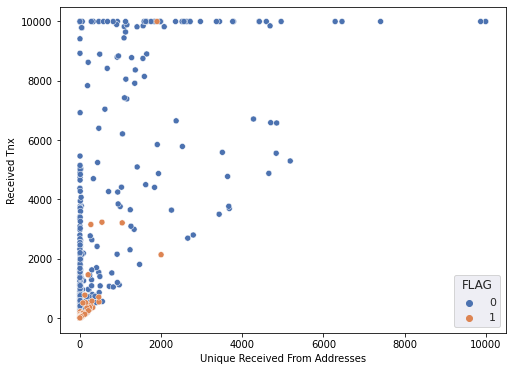

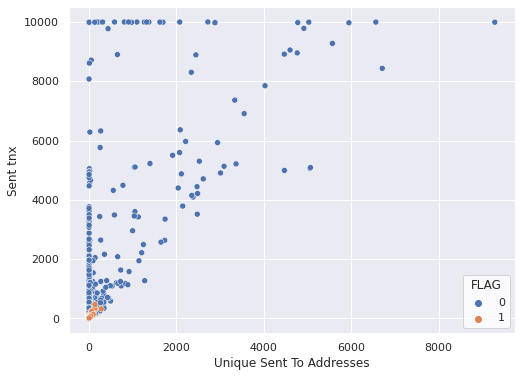

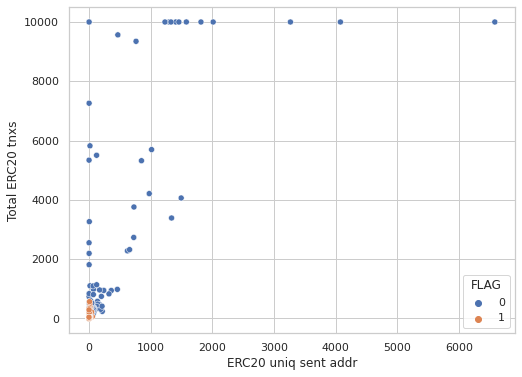

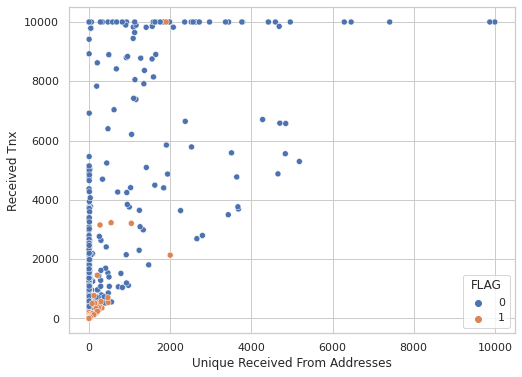

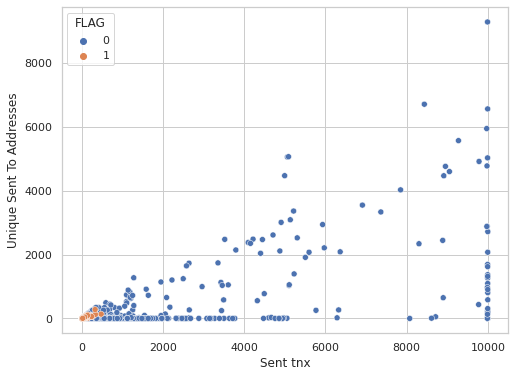

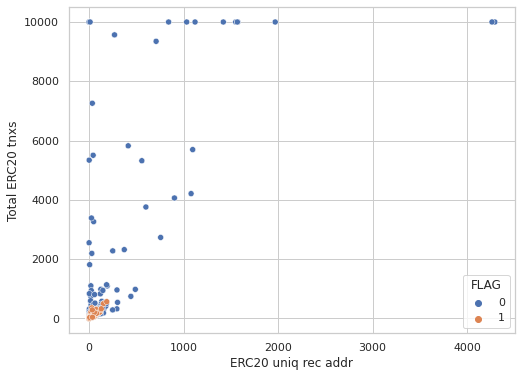

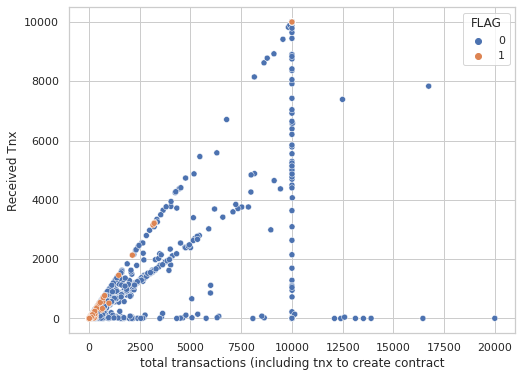

In [15]:
plt.subplots(figsize = (8, 6))
sns.set(style = 'darkgrid')
sns.scatterplot(data = df_copy,x = 'Unique Received From Addresses', y= 'Received Tnx',hue = 'FLAG' )
plt.show()


plt.subplots(figsize = (8, 6))
sns.set(style = 'whitegrid')
sns.scatterplot(data = df_copy,x = 'Unique Sent To Addresses', y= 'Sent tnx',hue = 'FLAG' )
plt.show()



plt.subplots(figsize = (8, 6))
sns.scatterplot(data = df_droped_corr,x = 'ERC20 uniq sent addr', y= 'Total ERC20 tnxs',hue = 'FLAG' )
plt.show()



plt.subplots(figsize = (8, 6))
sns.scatterplot(data = df_droped_corr,x = 'Unique Received From Addresses', y= 'Received Tnx',hue = 'FLAG' )
plt.show()



plt.subplots(figsize = (8, 6))
sns.scatterplot(data = df_droped_corr,x = 'Sent tnx', y= 'Unique Sent To Addresses',hue = 'FLAG' )
plt.show()


plt.subplots(figsize = (8, 6))
sns.scatterplot(data = df_droped_corr,x = 'ERC20 uniq rec addr', y= 'Total ERC20 tnxs',hue = 'FLAG' )
plt.show()


plt.subplots(figsize = (8, 6))
sns.scatterplot(data = df_droped_corr,x = 'total transactions (including tnx to create contract', y= 'Received Tnx',hue = 'FLAG' )
plt.show()



In [16]:
# looking at the correlation to the label
df_copy.corr()['FLAG'].sort_values(ascending= False)

FLAG                                                    1.000000
ERC20 min val sent                                      0.020860
ERC20 avg val sent                                      0.020597
ERC20 max val sent                                      0.020593
ERC20 total ether sent                                  0.020365
ERC20 total Ether sent contract                         0.011106
ERC20 min val rec                                       0.009166
ERC20 uniq sent token name                              0.007806
min val sent                                            0.006603
ERC20 avg val rec                                       0.006470
total ether balance                                    -0.003236
ERC20 max val rec                                      -0.003557
ERC20 total Ether received                             -0.003690
avg val received                                       -0.011871
Number of Created Contracts                            -0.013741
ERC20 uniq rec addr      

# Heatmap

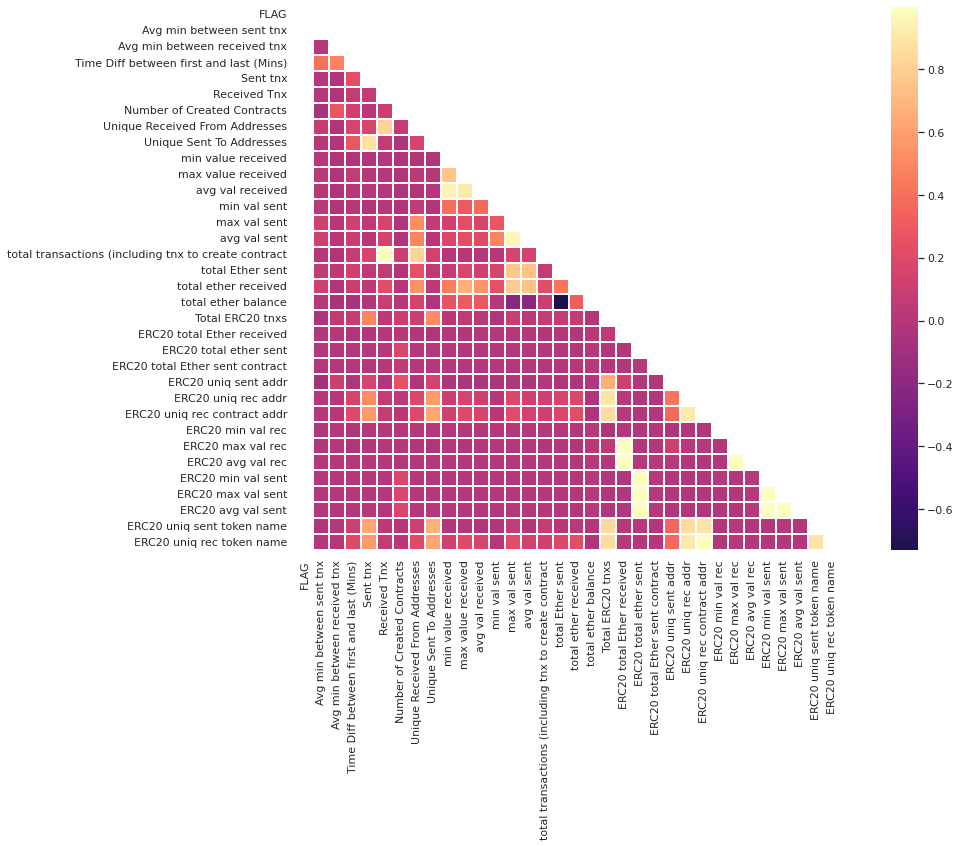

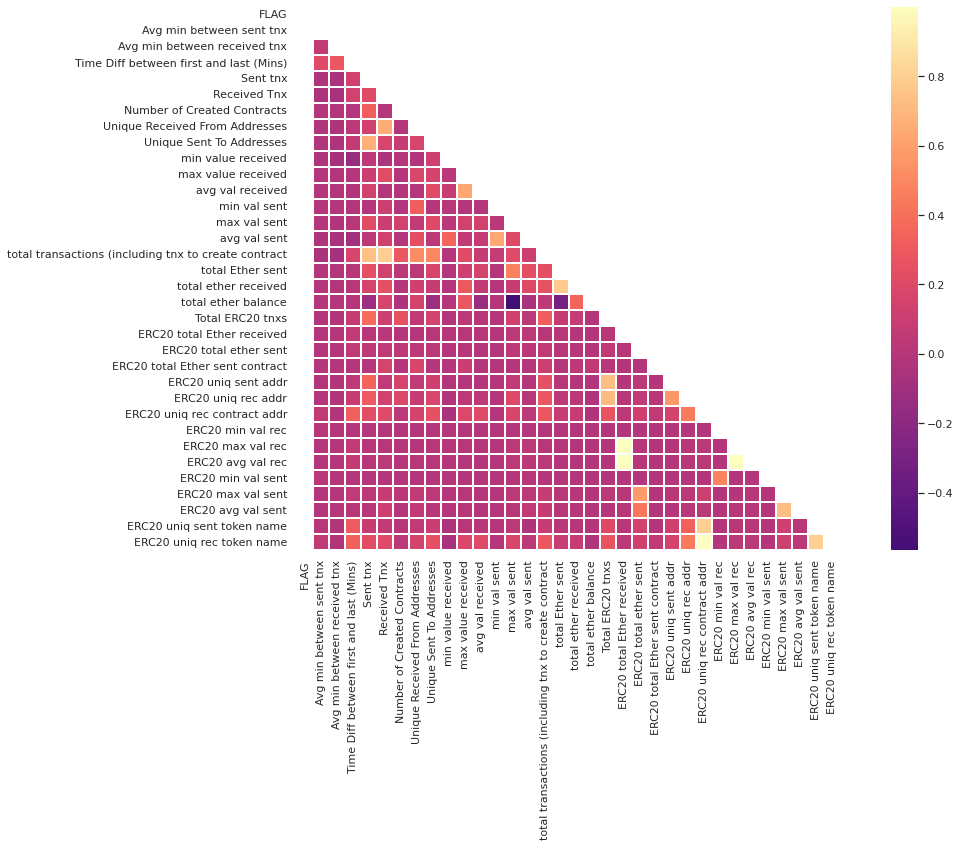

In [17]:
# Correlation metrix for each label - fraud and non-fraud
sample = df_copy[df_copy['FLAG']==1]
corr = sample.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)]=True
with sns.axes_style('white'):
    fig, ax = plt.subplots(figsize=(18,10))
    sns.heatmap(corr,  mask=mask, annot=False, cmap='magma', center=0, linewidths=0.1, square=True)

# Non-Fraudulant Correlation
sample = df_copy[df_copy['FLAG']==0]
corr = sample.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)]=True
with sns.axes_style('white'):
    fig, ax = plt.subplots(figsize=(18,10))
    sns.heatmap(corr,  mask=mask, annot=False, cmap='magma', center=0, linewidths=0.1, square=True)

# Standartization

In [18]:
# standardiztion - we will try to model the data with and without standartization and then we will decide which we should choose
# making a copy of the dataset ith only the numeric values for future calculations
#df_numeric_values = df_copy.select_dtypes(exclude = 'object')
#df_without_label = df_numeric_values.drop(columns = ['FLAG']) # we'll normalize the data without 'label' column
#original_columns = df_without_label.columns # to keep the original features' names
#original_indexes = df_without_label.index # to keep the original samples' id

# standardiztion
#standard_scaler = StandardScaler() # we initialize our scaler
#standard_scaler.fit(df_without_label) # we fit our scaler
#df_without_label = standard_scaler.transform(df_without_label) # we transform our dataframe using the scaler we have just fit

#df_without_label = pd.DataFrame(df_without_label) # turning the normalized data to dataframe (instead of array)
#df_without_label.columns = original_columns # returning the original features' names
#df_without_label.index = original_indexes # returning the original samples' id
#df_norm = pd.concat([df_without_label, df_copy['FLAG']], axis = 1) # adding back the labels
#df_norm


#### After checking model results i decided to use min-max normalization

# Dealing With Outliers

In [19]:
# as we saw at the table represent the correlation to the label, the below feature is the most correlated to the label
# we will try to find outliers from visualizing the relatioinship between this feature and the label

In [20]:
# Finding some outliers due to the scatter plots I ploted before.
# later we will check if deleting them will improve our model results
df_copy[(df_copy['Received Tnx']>3000)&(df_copy['FLAG'] == 1)& (df_copy['Received Tnx']<4000)].index

Int64Index([8408, 9219, 9322], dtype='int64')

### we want found some strong outliers for the fraud transactions, we will try to find them and drop these rows

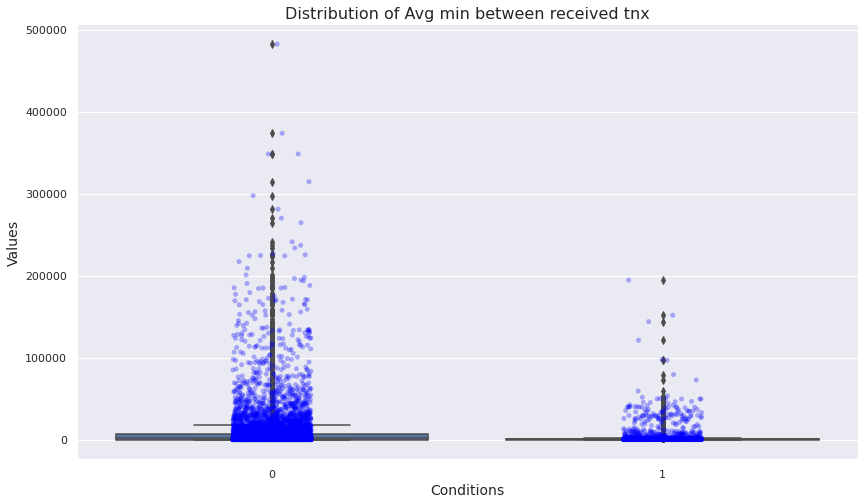

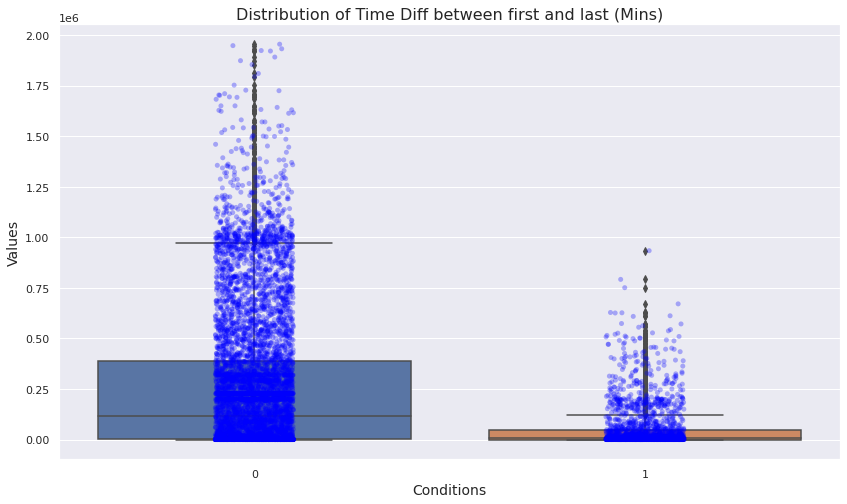

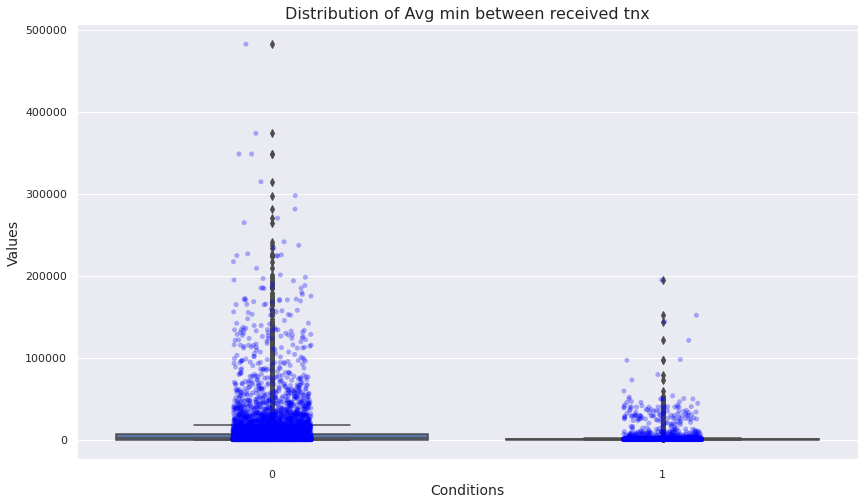

In [21]:
sns.set(style = 'darkgrid')
data1 = df_copy['Avg min between received tnx'][df_copy['FLAG']==0]
data2 = df_copy['Avg min between received tnx'][df_copy['FLAG']==1]
plt.subplots(figsize = (14, 8))
boxplot = sns.boxplot(data=[data1,data2])
boxplot = sns.stripplot(data=[data1,data2] ,marker="o", alpha=0.3, color="blue")
boxplot.axes.set_title("Distribution of Avg min between received tnx", fontsize=16)
boxplot.set_xlabel("Conditions", fontsize=14)
boxplot.set_ylabel("Values", fontsize=14)
plt.show()


data1 = df_copy['Time Diff between first and last (Mins)'][df_copy['FLAG']==0]
data2 = df_copy['Time Diff between first and last (Mins)'][df_copy['FLAG']==1]
plt.subplots(figsize = (14, 8))
boxplot = sns.boxplot(data=[data1,data2])
boxplot = sns.stripplot(data=[data1,data2] ,marker="o", alpha=0.3, color="blue")
boxplot.axes.set_title("Distribution of Time Diff between first and last (Mins)", fontsize=16)
boxplot.set_xlabel("Conditions", fontsize=14)
boxplot.set_ylabel("Values", fontsize=14)
plt.show()


data1 = df_copy['Avg min between received tnx'][df_copy['FLAG']==0]
data2 = df_copy['Avg min between received tnx'][df_copy['FLAG']==1]
plt.subplots(figsize = (14, 8))
boxplot = sns.boxplot(data=[data1,data2])
boxplot = sns.stripplot(data=[data1,data2] ,marker="o", alpha=0.3, color="blue")
boxplot.axes.set_title("Distribution of Avg min between received tnx", fontsize=16)
boxplot.set_xlabel("Conditions", fontsize=14)
boxplot.set_ylabel("Values", fontsize=14)
plt.show()



In [22]:
outliers_1 = df_copy['Time Diff between first and last (Mins)'][
    (df_copy['FLAG'] == 1) & 
                                (df_copy['Time Diff between first and last (Mins)']>600000)]
df_copy.drop(outliers_1.index, axis = 0, inplace = True)



outliers_2 = df_copy[(df_copy['FLAG']==1)&(df_copy['Avg min between received tnx']>60000)]
#df_for_changes.drop(outliers_2.index, axis = 0, inplace = True)


outliers_3 = df_copy[(df_copy['Received Tnx']>8000)&(df_copy['FLAG'] ==1)]
outliers_3
print(outliers_1)

print(df_copy['Avg min between received tnx'][(df_copy['FLAG']==0)& (df_copy['Avg min between received tnx'] >400000)].index)
print()
print(df_copy['Avg min between received tnx'][(df_copy['FLAG']==1)& (df_copy['Avg min between received tnx'] >140000)].index)

7788    933778.82
7828    608926.62
7866    611848.42
8534    625703.30
8953    750845.88
9267    626664.22
9319    791866.28
9717    628201.80
9840    670817.33
Name: Time Diff between first and last (Mins), dtype: float64
Int64Index([185], dtype='int64')

Int64Index([9806], dtype='int64')


# Label Encoding

In [23]:
# Exchange features with more than 50 categories (unique values)
df_1 = df_copy.copy()
label_encoding_features = [] # the list will hold the categorical features that we'll exchange by 'Label Encoding'
categorial_features_dict = {} # the dict will hold feature as keys, and transform categories dict as values

for feature in df_copy[['ERC20_most_rec_token_type','ERC20 most sent token type']].columns:
    if df_copy[feature].nunique() >= 50: # if there are more than different 50 categories - we'll use 'Label Encoding'
        label_encoding_features.append(feature)
        categorial_features_dict[feature] = {} # the dict will hold the original values as keys, and running number (category) as values
        i = 1 # running number (category)
        for sample in df_copy[feature]:
            if sample not in categorial_features_dict[feature].keys() and sample is not np.nan: # we want to replace each value (that isn't 'null') by the dict
                categorial_features_dict[feature][sample] = i
                i += 1

        df_copy[feature].replace(categorial_features_dict[feature], inplace = True) # exchange categories in the original dataframe
        df_copy[feature].replace(categorial_features_dict[feature], inplace = True) # exchange categories in df_categorical


## Removing Features With Small Correlation To The Label

In [24]:
dropping_corr=df_copy.drop(['ERC20 min val rec','ERC20 uniq sent token name','min val sent','ERC20 avg val rec',\
             'total ether balance','ERC20 max val rec','ERC20 total Ether received'],axis =1)


corr_decesion = pd.DataFrame(df_copy.corr()['FLAG'].sort_values(ascending= False))
d = corr_decesion[(corr_decesion['FLAG']<0.02) & (corr_decesion['FLAG']>-0.02)].index


dropping_corr = df_copy.drop(d,axis =1)
dropping_corr 

,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Unique Received From Addresses,Unique Sent To Addresses,min value received,max val sent,avg val sent,total transactions (including tnx to create contract,Total ERC20 tnxs,ERC20 total ether sent,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 most sent token type,ERC20_most_rec_token_type
0,0,844.26,1093.71,704785.63,721,89,40,118,0.000000,31.220000,1.200681,810,265.000000,3.560317e+07,0.000000,1.683100e+07,2.717799e+05,1,1
1,0,12709.07,2958.44,1218216.73,94,8,5,14,0.000000,1.800000,0.032844,102,8.000000,2.260809e+00,2.260809,2.260809e+00,2.260809e+00,2,2
2,0,246194.54,2434.02,516729.30,2,10,10,2,0.113119,3.538616,1.794308,12,8.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,3,3
3,0,10219.60,15785.09,397555.90,25,9,7,13,0.000000,450.000000,70.001834,34,14.000000,1.141223e+04,100.000000,9.029231e+03,3.804077e+03,4,3
4,0,36.61,10707.77,382472.42,4598,20,7,19,0.000000,9.000000,0.022688,4619,42.000000,1.235399e+05,0.000000,4.500000e+04,1.372666e+04,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9835,1,0.00,0.00,8427.92,0,1,1,0,0.000000,0.000000,0.000000,2,36.292751,1.389373e+07,11764.738134,1.306006e+07,6.331012e+06,3,5
9836,1,12635.10,631.39,58748.48,4,13,11,4,0.004082,12.200000,9.166365,17,2.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,262,400
9837,1,0.00,0.00,0.00,0,0,0,0,0.000000,0.000000,0.000000,0,1.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,262,390
9838,1,2499.44,2189.29,261601.88,67,43,31,44,0.001078,9.500000,0.922179,110,5.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,262,250


# Modeling

              precision    recall  f1-score   support

           0       0.89      0.99      0.94      2319
           1       0.95      0.56      0.70       626

    accuracy                           0.90      2945
   macro avg       0.92      0.77      0.82      2945
weighted avg       0.90      0.90      0.89      2945



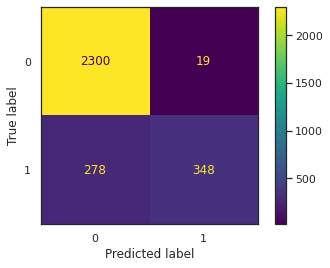

In [25]:
# Logistic Regression with the 2 categorical features
sns.set(style = 'white')

X = df_copy.drop(['FLAG',],axis =1)
Y = df_copy['FLAG']
X_train, X_test, y_train, y_test = train_test_split(X, Y ,test_size = 0.3, random_state = 42)


scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X_train)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(max_iter = 10000)
log_model.fit(X_train,y_train)
y_pred = log_model.predict(X_test)


print(classification_report(y_test,y_pred))


plot_confusion_matrix(log_model,X_test,y_test)

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2319
           1       1.00      0.98      0.99       626

    accuracy                           1.00      2945
   macro avg       1.00      0.99      0.99      2945
weighted avg       1.00      1.00      1.00      2945



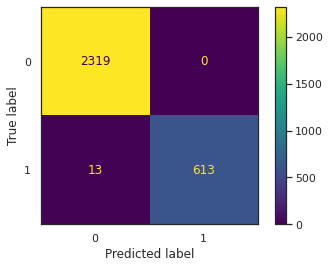

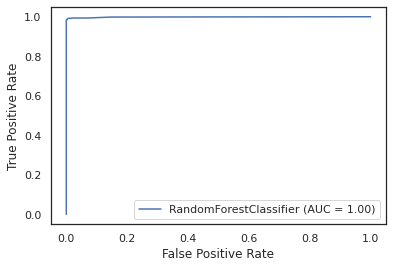

In [26]:
##Random Forest with MinMax Normalization
X = df_copy.drop(['FLAG'],axis =1)
Y = df_copy['FLAG']
X_train, X_test, y_train, y_test = train_test_split(X, Y ,test_size = 0.3, random_state = 42)



scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X_train)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


rfc = RandomForestClassifier(n_estimators=25,max_features= 5,random_state = 101)
rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_test)


print(classification_report(y_test,y_pred))



plot_confusion_matrix(rfc,X_test,y_test)

plot_roc_curve(rfc,X_test,y_test)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2295
           1       0.94      0.94      0.94       649

    accuracy                           0.97      2944
   macro avg       0.96      0.96      0.96      2944
weighted avg       0.97      0.97      0.97      2944



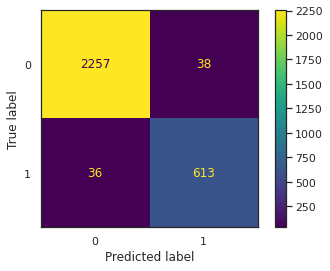

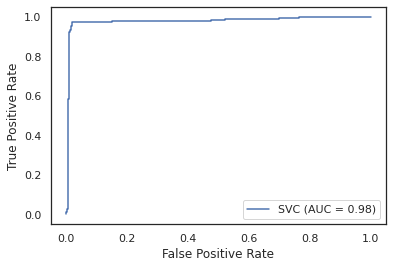

In [27]:
#SVM model, not good as the random forest

from sklearn.svm import SVC

X = df_copy.drop([185, 9806],axis = 0).drop(['FLAG'],axis =1)
Y = df_copy.drop([185, 9806],axis = 0)['FLAG']
X_train, X_test, y_train, y_test = train_test_split(X, Y ,test_size = 0.3, random_state = 42)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X_train)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
model = SVC(kernel ='rbf', C=9)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
plot_confusion_matrix(model,X_test,y_test)

print(classification_report(y_test,y_pred))
print(plot_roc_curve(model,X_test,y_test))

In [28]:
# Grid search for SVM
param_grid = {'C':[i for i in range(1,10,1)],'kernel':['linear','rbf','poly']}
grid = GridSearchCV(model,param_grid,scoring = 'recall')
grid.fit(X_train,y_train)

GridSearchCV(estimator=SVC(C=9),
             param_grid={'C': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'kernel': ['linear', 'rbf', 'poly']},
             scoring='recall')

In [29]:
grid.best_params_

{'C': 9, 'kernel': 'rbf'}

# PCA

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      2295
           1       0.91      0.87      0.89       649

    accuracy                           0.95      2944
   macro avg       0.94      0.92      0.93      2944
weighted avg       0.95      0.95      0.95      2944



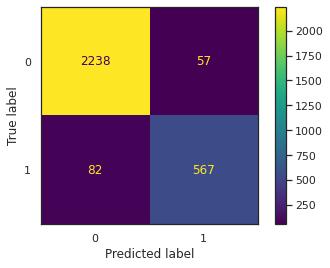

In [30]:
#PCA and then trying to improve the random forest model, that is already wonderfull - the results without PCA are better

X = df_copy.drop([185, 9806],axis = 0).drop(['FLAG'],axis =1)
Y = df_copy.drop([185, 9806],axis = 0)['FLAG']
X_train, X_test, y_train, y_test = train_test_split(X, Y ,test_size = 0.3, random_state = 42)

scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X_train)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

from sklearn.decomposition import PCA
pca_model = PCA(n_components= 5)
X = pca_model.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, Y ,test_size = 0.3, random_state = 42)

rfc = RandomForestClassifier(n_estimators=25,max_features= 5,random_state = 101)
rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_test)

from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(rfc,X_test,y_test)

print(classification_report(y_test,y_pred))

# Back To Pre-proccessing

In [31]:
# finding more outliers and trying to improve the model
for i in df_copy.drop('FLAG',axis =1).columns:
    IQR = np.percentile(df_copy[i],75) -  np.percentile(df_copy[i],25)
    lower_limit = np.percentile(df_copy[i],25) - 1.5*IQR
    upper_limit = np.percentile(df_copy[i],75) + 1.5*IQR
    outliers_a = df_copy[i][df_copy[i] > upper_limit].shape \
    + df_copy[i][df_copy[i] < lower_limit].shape
    if outliers_a[0]/df_copy['Unique Sent To Addresses'].shape[0] <= 0.07:
        print(i)
        
        
        
outliers_a = df_copy['avg val sent'][df_copy['avg val sent'] > upper_limit].shape \
    + df_copy['avg val sent'][df_copy['avg val sent'] < lower_limit].shape
outliers_a
        
    
    
    
outliers_a = df_copy['avg val sent'][df_copy['avg val sent'] > upper_limit].index
df_droped_corr.drop(outliers_a,axis = 0)

avg val sent


,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,max value received,avg val received,min val sent,max val sent,avg val sent,total transactions (including tnx to create contract,total Ether sent,total ether received,total ether balance,Total ERC20 tnxs,ERC20 total Ether received,ERC20 total Ether sent contract,ERC20 uniq sent addr,ERC20 uniq rec addr,ERC20 uniq rec contract addr,ERC20 min val rec,ERC20 avg val rec,ERC20 uniq sent token name,ERC20 most sent token type,ERC20_most_rec_token_type
0,0,844.26,1093.71,704785.63,721,89,0,40,118,0.000000,45.806785,6.589513,0.000000,31.220000,1.200681,810,865.691093,586.466675,-279.224419,265.000000,3.558854e+07,0.000000,30.000000,54.000000,58.000000,0.000000,2.655861e+05,39.000000,Cofoundit,Numeraire
1,0,12709.07,2958.44,1218216.73,94,8,0,5,14,0.000000,2.613269,0.385685,0.000000,1.800000,0.032844,102,3.087297,3.085478,-0.001819,8.000000,4.034283e+02,0.000000,1.000000,5.000000,7.000000,0.000000,5.763262e+01,1.000000,Livepeer Token,Livepeer Token
2,0,246194.54,2434.02,516729.30,2,10,0,10,2,0.113119,1.165453,0.358906,0.050000,3.538616,1.794308,12,3.588616,3.589057,0.000441,8.000000,5.215121e+02,0.000000,0.000000,7.000000,8.000000,0.000000,6.518901e+01,0.000000,None,XENON
4,0,36.61,10707.77,382472.42,4598,20,1,7,19,0.000000,12.802411,2.671095,0.000000,9.000000,0.022688,4619,104.318883,53.421897,-50.896986,42.000000,1.628297e+05,0.000000,4.000000,23.000000,27.000000,0.000000,4.934232e+03,6.000000,StatusNetwork,EOS
5,0,9900.12,375.48,20926.68,2,3,0,2,1,0.724148,4.813776,3.234908,4.166800,5.536916,4.851858,5,9.703716,9.704724,0.001008,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,None,OmiseGO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9836,1,12635.10,631.39,58748.48,4,13,0,11,4,0.004082,12.000000,2.821060,0.465461,12.200000,9.166365,17,36.665461,36.673777,0.008316,2.000000,1.337000e+00,0.000000,0.000000,2.000000,2.000000,0.000000,6.685000e-01,0.000000,,GSENetwork
9837,1,0.00,0.00,0.00,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,1.000000,1.337000e+01,0.000000,0.000000,1.000000,1.000000,13.370000,1.337000e+01,0.000000,,Blockwell say NOTSAFU
9838,1,2499.44,2189.29,261601.88,67,43,0,31,44,0.001078,21.310000,1.234192,0.004000,9.500000,0.922179,110,61.785995,53.070252,-8.715743,5.000000,1.503470e+03,0.000000,0.000000,5.000000,5.000000,0.000000,3.006939e+02,0.000000,,Free BOB Tokens - BobsRepair.com
9839,1,0.00,0.00,0.00,0,1,0,1,0,0.500000,0.500000,0.500000,0.000000,0.000000,0.000000,1,0.000000,0.500000,0.500000,36.292751,1.298795e+08,111.161233,5.646765,7.604514,4.899933,486.518054,4.354898e+06,1.381588,None,OmiseGO


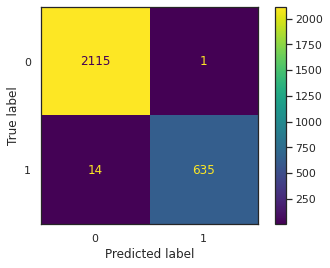

In [32]:
sns.set(style = 'white')
##Random Forest after deleting the outliers - not better than the model without deleting the outliers
X = df_copy.drop(outliers_a,axis = 0).drop(['FLAG'],axis =1)
Y = df_copy.drop(outliers_a,axis = 0)['FLAG']

X_train, X_test, y_train, y_test = train_test_split(X, Y ,test_size = 0.3, random_state = 42)


from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X_train)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


rfc = RandomForestClassifier(n_estimators=25,max_features= 5,random_state = 101)
rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_test)

from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(rfc,X_test,y_test)

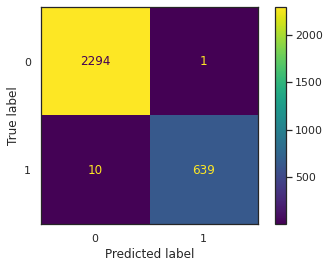

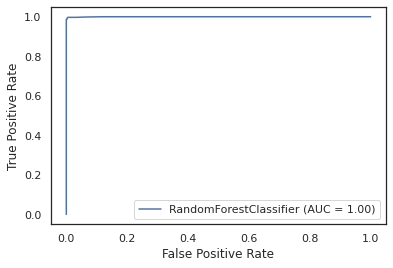

In [33]:
sns.set(style = 'white')
##Random Forest after deleting the outliers - THE BEST RESULTS

X = df_copy.drop([185, 9806],axis = 0).drop(['FLAG'],axis =1)
Y = df_copy.drop([185, 9806],axis = 0)['FLAG']
X_train, X_test, y_train, y_test = train_test_split(X, Y ,test_size = 0.3, random_state = 42)


from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X_train)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


rfc = RandomForestClassifier(n_estimators=25,max_features= 5,random_state = 101)
rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_test)


from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(rfc,X_test,y_test)

print(plot_roc_curve(rfc,X_test,y_test))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2295
           1       1.00      0.98      0.99       649

    accuracy                           1.00      2944
   macro avg       1.00      0.99      0.99      2944
weighted avg       1.00      1.00      1.00      2944



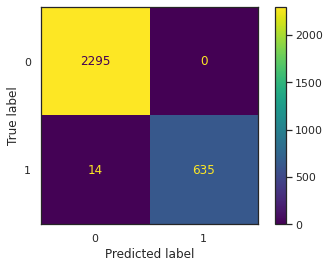

In [34]:
# This is The dataset after deleting many features with small correlation to the label
# we can see that the results are slightly less good then the original dataset
# but it is a very small change, so we may consider using this one due to the small number of features


sns.set(style = 'white')

X = dropping_corr.drop([185, 9806],axis = 0).drop(['FLAG'],axis =1)
Y = dropping_corr.drop([185, 9806],axis = 0)['FLAG']
X_train, X_test, y_train, y_test = train_test_split(X, Y ,test_size = 0.3, random_state = 42)


from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X_train)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


rfc = RandomForestClassifier(n_estimators=25,max_features= 5,random_state = 101)
rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_test)


from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(rfc,X_test,y_test)

print(classification_report(y_test,y_pred))

# Conclusion

In this notebook, we wanted to make a classification, and to understand which Ethereum transaction is a 
fraud, and which is not. We did EDA, we chose which attributes we should use to predict the model, and 
which features we should avoid. We had to deal with outliers in the data set, and we had to be aware of 
correlation issues, that can make us decide to avoid some features, that are highly correlated with others. 
Then we used 3 different models – Logistic Regression, SVM, and Random Forest
The Random Forest Model did the best work for us. to conclude, we think that we answer the question 
well, and we could predict fraudulent transactions. For future work, we suggest adding the volatility of 
Ethereum to the consideration, for example in times there is the high volatility of the crypto, it may be 
the time that the fraudulent transactions are increasing.